782/782 [==============================] - 2s 3ms/step - loss: 0.6894 - accuracy: 0.5211
LSTM Test Loss: 0.6903685331344604
LSTM Test Accuracy: 0.5287200212478638
RNN Test Loss: 0.6902445554733276
RNN Test Accuracy: 0.5232800245285034
GRU Test Loss: 0.6894392967224121
GRU Test Accuracy: 0.5210800170898438


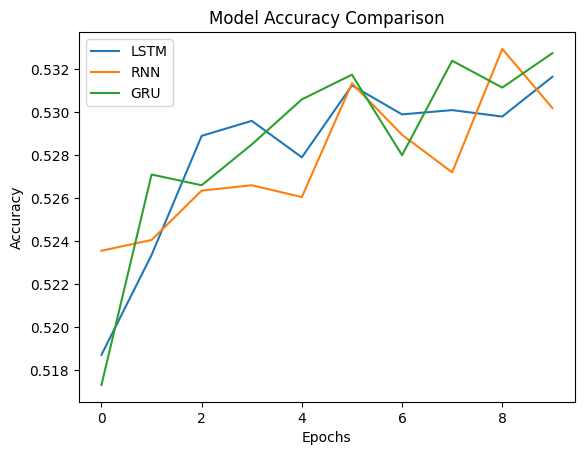

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, SimpleRNN, GRU
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence

# Sample data (you should replace this with your own labeled dataset)
texts = [
    "I love this movie!",
    "This is terrible.",
    "The acting was superb.",
    "I can't stand it.",
    "It's a masterpiece."
]

labels = [1, 0, 1, 0, 1]  # 1 for positive sentiment, 0 for negative sentiment

# Tokenize text and create word index
tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)
word_index = tokenizer.word_index
vocab_size = len(word_index) + 1

# Convert text to sequences and pad them to a fixed length
sequences = tokenizer.texts_to_sequences(texts)
max_sequence_length = max(len(seq) for seq in sequences)
padded_sequences = pad_sequences(sequences, maxlen=max_sequence_length)

# Convert labels to numpy array
labels = np.array(labels)

# Split the data into training and testing sets
# split_ratio = 0.8
# split_index = int(len(padded_sequences) * split_ratio)
# x_train, x_test = padded_sequences[:split_index], padded_sequences[split_index:]
# y_train, y_test = labels[:split_index], labels[split_index:]
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=10000)

max_length = 4
x_train = sequence.pad_sequences(x_train, maxlen=max_length)
x_test = sequence.pad_sequences(x_test, maxlen=max_length)


# LSTM Model
embedding_dim = 100
lstm_units = 64

lstm_model = Sequential()
lstm_model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_sequence_length))
lstm_model.add(LSTM(units=lstm_units))
lstm_model.add(Dense(units=1, activation='sigmoid'))

lstm_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# RNN Model
rnn_model = Sequential()
rnn_model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_sequence_length))
rnn_model.add(SimpleRNN(units=lstm_units))
rnn_model.add(Dense(units=1, activation='sigmoid'))

rnn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# GRU Model
gru_model = Sequential()
gru_model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_sequence_length))
gru_model.add(GRU(units=lstm_units))
gru_model.add(Dense(units=1, activation='sigmoid'))

gru_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the models
epochs = 10
batch_size = 32

lstm_history = lstm_model.fit(x_train, y_train, epochs=epochs, batch_size=None, validation_split=0.2, verbose=0)
rnn_history = rnn_model.fit(x_train, y_train, epochs=epochs, batch_size=None, validation_split=0.2, verbose=0)
gru_history = gru_model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=0)

# Evaluate the models
lstm_loss, lstm_accuracy = lstm_model.evaluate(x_test, y_test)
rnn_loss, rnn_accuracy = rnn_model.evaluate(x_test, y_test)
gru_loss, gru_accuracy = gru_model.evaluate(x_test, y_test)

print("LSTM Test Loss:", lstm_loss)
print("LSTM Test Accuracy:", lstm_accuracy)
print("RNN Test Loss:", rnn_loss)
print("RNN Test Accuracy:", rnn_accuracy)
print("GRU Test Loss:", gru_loss)
print("GRU Test Accuracy:", gru_accuracy)

# Plot accuracy over epochs for all models
plt.plot(lstm_history.history['accuracy'], label='LSTM')
plt.plot(rnn_history.history['accuracy'], label='RNN')
plt.plot(gru_history.history['accuracy'], label='GRU')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.legend()
plt.show()